# ST1 Capstone Project


In [ ]:
#Imports contents from google drive and libraries that will be used
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1: Reading Dataset

In [ ]:
carData = pd.read_csv('/content/drive/MyDrive/UC/ST1CapstoneProject/Data/train-data.csv')  #reads the file
carData = carData.drop(columns='Unnamed: 0')                                               #Removes the duplicate index number column that was unnamed
print('Shape with potential duplicates', carData.shape)
carData = carData.drop_duplicates()                                                        #Removes duplicate values if any
print('Shape with no duplicates', carData.shape)

# Removing the units of measurements on the values so they can be treated as integers/floats
# For Mileage, working under the assumption kmpl is going to mean the same as km/kg
carData['Mileage'] = carData['Mileage'].str.strip('kmpl/kg')                            #Removes these letters from all values in
carData['Mileage'] = carData['Mileage'].astype('float64')                               #Converts Mileage to float type
carData['Engine'] = carData['Engine'].str.strip('C')                                    #Same thing but for Engine
carData['Engine'] = carData['Engine'].astype('float64')
carData['Power'] = carData['Power'].str.strip('bhp ')                                   #Power uses the string 'null' instead of actual null for some reason
carData['Power'] = carData['Power'].replace('null', None)                               #Replaces string null with actual null
carData['Power'] = carData['Power'].astype('float64')

display(carData)                                                                           #Displays all data from dataset (shortens if too long)

Shape with potential duplicates (6019, 13)
Shape with no duplicates (6019, 13)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


**Key Details**
*   There are 6019 car information in this dataset each specifying 13 attributes
*   There are 66 entries using km/kg instead of kmpl due to gas-based fuel
*   There are 2 entries using electric as fuel and have no mileage
*   Mileage is in km/kg or kmpl depending on fuel type
 *   km/kg = kilometer per kilogram (of gaseous fuel)
 *   kmpl = kilometer per liter (of liquid fuel)
*Engine is in CC
 *   CC = cubic centimeter
*   Power is in bhp
 *   bhp = brake horse power
*   1 Lakh = 100,000 Rupees (Indian Dollar)
*   Price is in Lakh
*   CNG, LPG are gas-based fuels




# Step 2: Problem Statement Definition

*   Create a prediction model to predict the prices of potential cars
*   Target Variable: Price in Lakh
*   Predictor/Features: Year, Kilometers Driven, Fuel Type, Transmission, Mileage, Engine, Power, Price

# 3: Choosing appropriate ML/AI algorithm for Data analysis
*   ML because the problem is to create a prediction model which would need to be continuous


# 4: Visualising the distribution of Target variable


(array([1396., 2194.,  929.,  376.,  234.,  189.,  130.,  118.,   94.,
          77.,   62.,   45.,   27.,   34.,   24.]),
 array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
        16.66666667, 20.        , 23.33333333, 26.66666667, 30.        ,
        33.33333333, 36.66666667, 40.        , 43.33333333, 46.66666667,
        50.        ]),
 <BarContainer object of 15 artists>)

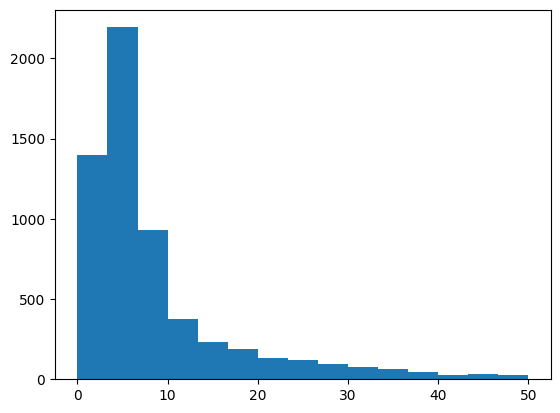

In [ ]:
#Defines the target variable as a price for simplicity
carPrice = (carData['Price'])

#creates histogram with 20 different bars and ranges from 0 to 50 lakh
plt.hist(carPrice, bins=15, range=(0,50))
#There are values with higher lakh than the range but we can assume that they are outliers as the curve is flat

# Observation of Step 4
*   The data distribution for target variable has a very large positive skew but is a bell curve
*   There are sufficient rows for each type

# 5: Basic Exploratory Data Analysis

In [ ]:
#Looking at sample rows in the data
carData.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
#Looking at sample rows in the data
carData.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,NaN,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,NaN,2.50


In [ ]:
# Observing the summarized data information
# Remove variables which have too many missing values (Missing Values > 30%)
# New_Price will be removed
carData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 611.4+ KB


In [ ]:
# Looking at the descriptive statistics of the data
# Removing value units becomes relevant here
carData.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017.000000,5983.000000,5876.000000,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,NaN,NaN,NaN,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,18.134961,1621.276450,113.253050,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,4.582289,601.355233,53.874957,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,0.000000,72.000000,34.200000,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,15.170000,1198.000000,75.000000,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,18.150000,1493.000000,97.700000,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,21.100000,1984.000000,138.100000,5.000000,NaN,9.950000


In [ ]:
# Finding unique values for each column
# If unique values < 20 then the variable is likely a category

carData.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               430
Engine                146
Power                 369
Seats                   9
New_Price             540
Price                1373
dtype: int64

# Step 5 Observations
* Name - Categorical (There is no reason to quantify names)
* Year - Continuous
* Kilometers_Driven - Continuous
* Fuel_Type - Categorical
* Transmission - Categorical
* Owner_Type - Categorical
* Mileage - Continuous
* Engine - Continuous
* Power - Continuous
* Seats - Categorical
* New_Price - Continuous
* Price - Continuous


# Step 6: Removing Unwanted columns
Qualitative data includes:
* Name
* Location
* Fuel_Type - Keep
* Transmission - Keep
* Owner_Type

Additionally Seats and New_Price will be remove due to redundancy

In [ ]:
#Removes the previously listed colums
carData = carData.drop(columns=['Name', 'Location', 'Owner_Type', 'Seats', 'New_Price'])
display(carData)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine,Power,Price
0,2010,72000,CNG,Manual,26.60,998.0,58.16,1.75
1,2015,41000,Diesel,Manual,19.67,1582.0,126.20,12.50
2,2011,46000,Petrol,Manual,18.20,1199.0,88.70,4.50
3,2012,87000,Diesel,Manual,20.77,1248.0,88.76,6.00
4,2013,40670,Diesel,Automatic,15.20,1968.0,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,28.40,1248.0,74.00,4.75
6015,2015,100000,Diesel,Manual,24.40,1120.0,71.00,4.00
6016,2012,55000,Diesel,Manual,14.00,2498.0,112.00,2.90
6017,2013,46000,Petrol,Manual,18.90,998.0,67.10,2.65


# Step 7: Visual Exploratory Data Analysis

Categorical Predictors:
* Fuel_Type
* Transmission

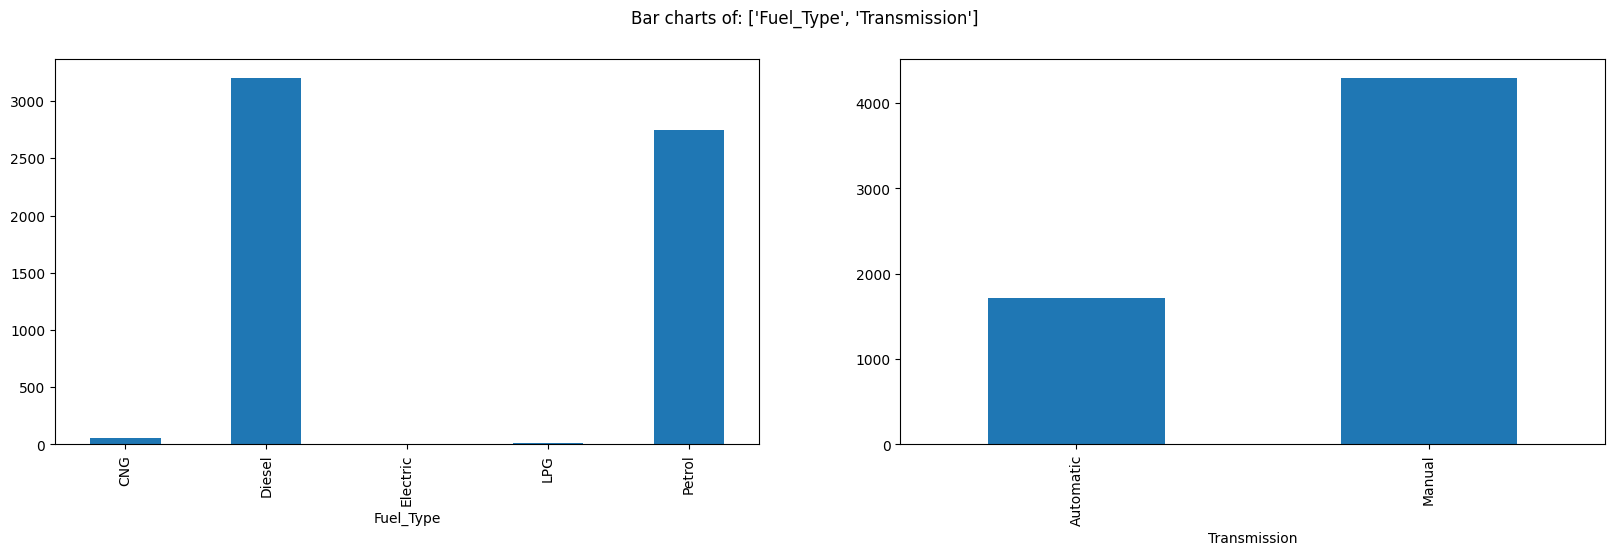

In [ ]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
  fig, subPlot = plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
  fig.suptitle('Bar charts of: ' + str(colsToPlot))

  for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
    inpData.groupby(colName).size().plot(kind='bar', ax=subPlot[plotNumber])

PlotBarCharts(inpData=carData, colsToPlot=['Fuel_Type', 'Transmission'])

# Observations from Step 7
* There are primarily Petrol and Diesel Cars
 * CNG, LPG and Electric are too few to be considered viable categories and will be removed later
* There are more Manual cars than Automatic but enough not to be skewed

# Step 8: Visualize distribution of all Coninuous Predictors


Continuous Columns include
* Year
* Kilometers_Driven
* Mileage
* Engine
* Power

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Kilometers_Driven'}>],
       [<Axes: title={'center': 'Mileage'}>,
        <Axes: title={'center': 'Engine'}>],
       [<Axes: title={'center': 'Power'}>, <Axes: >]], dtype=object)

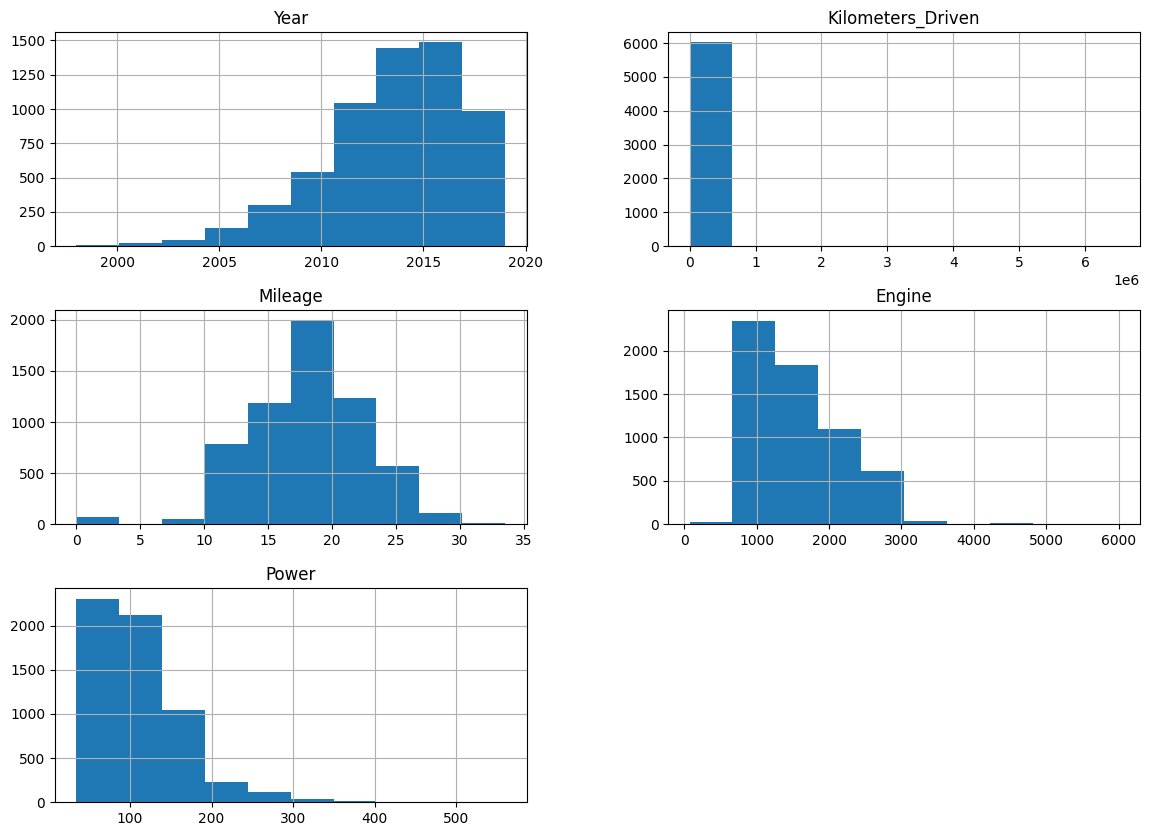

In [ ]:
#Plot histogram for all continuous columns
carData.hist(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power'], figsize=(14,10))

# Observations from Step 8
* For Year around 1500 are between 2015 to 2017
* For Mileage around 2000 are between 16 to 20 kmpl
* For Engine around 2400 are between 800 to 1200 CC
* For Power around 3400 are around 50 to 110 bhp
* For kilometers_driven, there are outliers beyond 600000
* All distribution looks good, except kilometers_driven



# Step 9: Outlier Analysis


In [ ]:
#Observing the outliers for
outliers = carData[carData['Kilometers_Driven']<600000].sort_values(by=['Kilometers_Driven'], ascending=False)
outliers['Kilometers_Driven']

2823    480000
3092    480000
4491    445000
3649    300000
1528    299322
         ...  
1198      1000
1242      1000
5941      1000
5606       600
1361       171
Name: Kilometers_Driven, Length: 6015, dtype: int64

In [ ]:
#Observation shows only 4 of the 6019 data points would be lost if they were to be removed
# Additionally the outliers that are above 300,000 can be removed as there are 3 of them
# The loss of 7 rows is negligible
#Removing outliers
carData = carData.drop(carData[carData['Kilometers_Driven']>300000].index)

#Step 10: Visualising Data after outlier removal

array([[<Axes: title={'center': 'Kilometers_Driven'}>]], dtype=object)

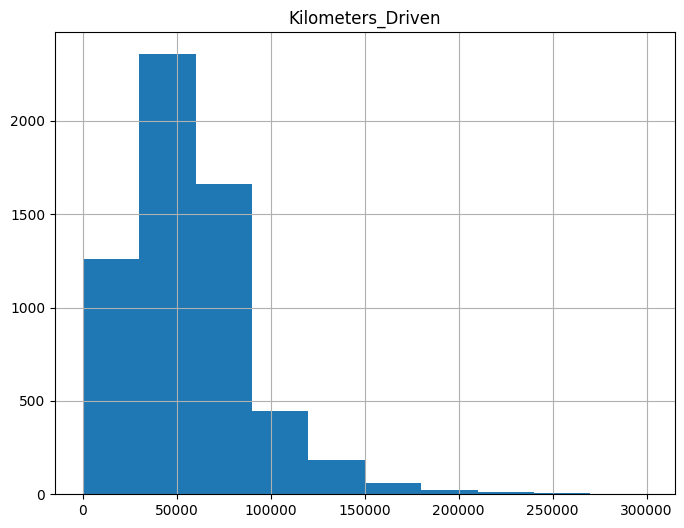

In [ ]:
carData.hist(['Kilometers_Driven'], figsize=(8,6))

# Observation from Step 10
* The distribution has improved and is no longer just a single pole
* There is a small but noticeable tail around 250,000 but since it is noticeable it is enough to be kept

# Step 11: Missing Values Analysis

In [ ]:
#Finding how many missing values are in each column
carData.isnull().sum()

Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Mileage                2
Engine                36
Power                143
Price                  0
dtype: int64

# Observations from Step 11
* There are a few missing values, but is not over 30% as such can be treated

In [ ]:
# Treating the data by inputting the median values for Mileage, Engine and Power

# Medians of the columns with missing values
mileage_med = carData['Mileage'].median()
engine_med = carData['Engine'].median()
power_med = carData['Power'].median()

# Replacing the missing values with the median
carData['Mileage'] = carData['Mileage'].fillna(value=mileage_med)
carData['Engine'] = carData['Engine'].fillna(value=engine_med)
carData['Power'] = carData['Power'].fillna(value=power_med)


# Step 12: Feature Selection
* The target variable for this dataset is continuous as such the following two scenarios will need attention
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

# Relationship Exploration: Continuous vs Continuous
* For Continuous vs Continuous relationships, it can be visualised using scatter plot
* The strength of the relationship can be measured using Pearson's correlation value

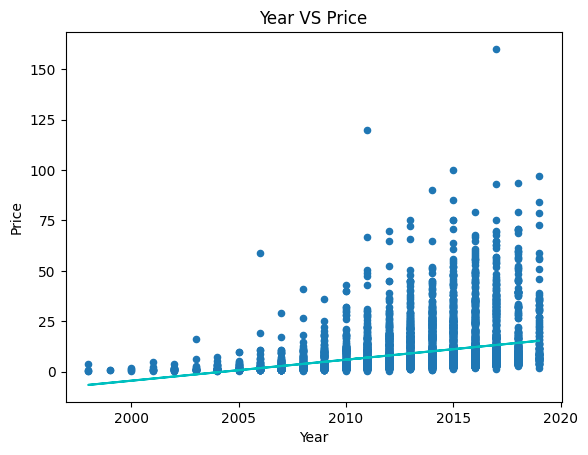

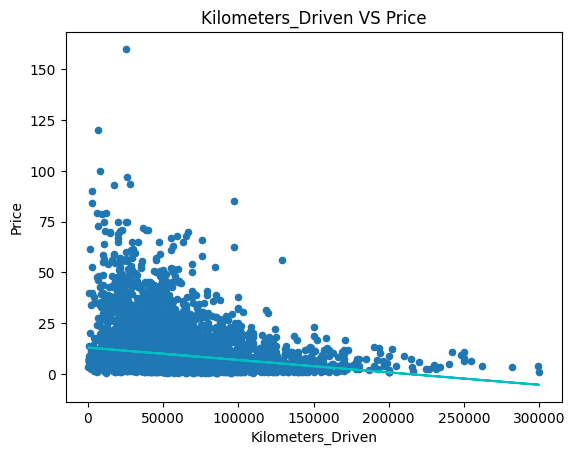

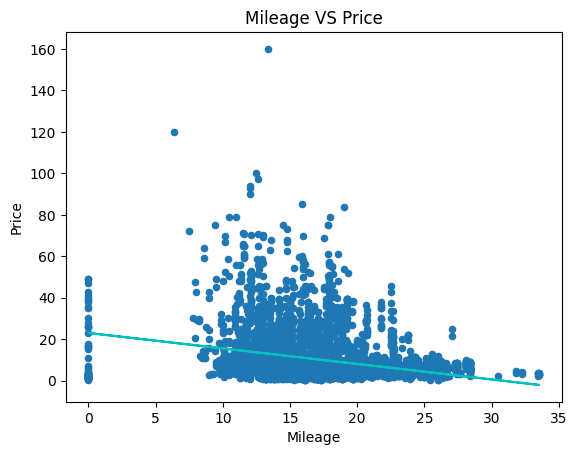

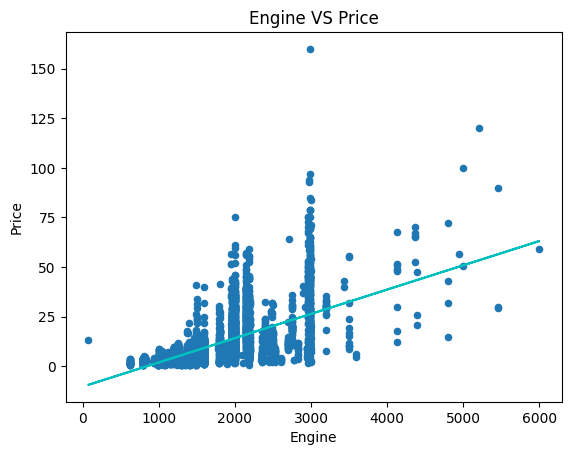

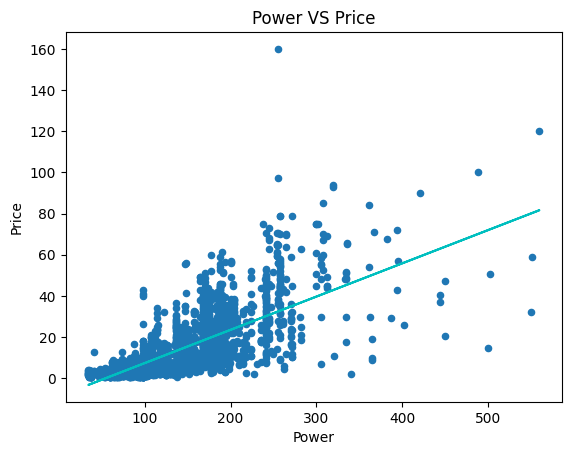

In [ ]:
ContinuousVals = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power']
#Using numpy here to produce lines of best fit (LoBF)
#Plots scatter chart for the above values compared to target variable
for val in ContinuousVals:
  #converts the columns into numpy arrays so it can read them
  x = np.array(carData[val])
  y = np.array(carData['Price'])

  #Plots the data
  carData.plot.scatter(x=val, y = 'Price', title = val+' VS Price')

  #determines the least squares polynomial fit of the current val and price
  a, b = np.polyfit(x, y, 1)

  #Plots the LoBF in cyan
  # ax+b is a the formula for a linear equation
  plt.plot(x, a*x+b, 'c')

# Observations of Continuous vs Continuous correlation
* Year vs Price: Increasing trend
* Kilometers_Driven vs Price: Decreasing Trend
* Mileage vs Price: Decreasing trend (according to LoBF)
* Engine vs Price: Increasing trend (good angle from LoBF)
* Power vs Price: Increasing trend (good angle from LoBF)

# Step 13: Statistical Feature Selection (Cont. vs Cont.) using Correlation value
* Correlation coefficient between (0,1] means there is a positive linear relation
* Correlation coefficient between [-1,0) means there is a negative linear relation
* Correlation coefficient near 0 means there is very low or no relation.
* If |r|>0.5 then it is a good relationshipt

In [ ]:
#Calculating the correlation matrix
# Now ContinuousVals include price
ContinuousVals = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

# Creates the matrix
correlationData = carData[ContinuousVals].corr()
correlationData['Price']

Year                 0.305004
Kilometers_Driven   -0.184500
Mileage             -0.306781
Engine               0.657084
Power                0.769537
Price                1.000000
Name: Price, dtype: float64

In [ ]:
# filters columns where the absulute correlations is >0.5 with price
priceCorrelation = correlationData[abs(correlationData['Price']> 0.5)]
priceCorrelation['Price']

Engine    0.657084
Power     0.769537
Price     1.000000
Name: Price, dtype: float64

# Observations from Step 13
The final selected continuous columns are:
* Engine
* Power

# Step 14: Relationship exploration: Categorical vs Continuous
* For Categorical vs Continuous, box plots will be used
* Also the relation strength will be measured using Anova test

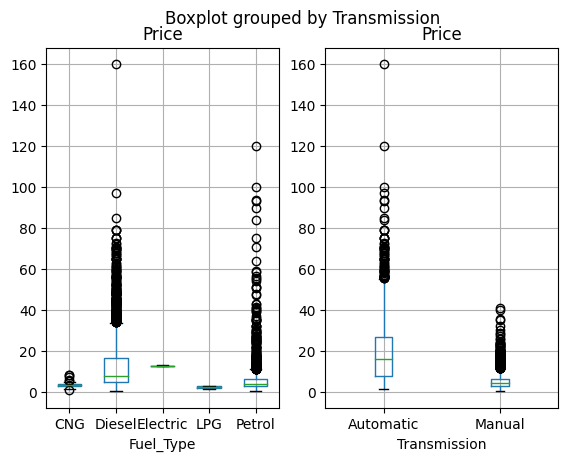

In [ ]:
# The categorical columns
categoricalVals = ['Fuel_Type', 'Transmission']

fig, plotCanvas=plt.subplots(nrows=1, ncols=len(categoricalVals))

for val, i in zip(categoricalVals, range(len(categoricalVals))):
  carData.boxplot(column='Price', by=val, figsize=(10,8), vert=True, ax=plotCanvas[i])

# Observation from Step 14
Both predictors have varying positions as such appear to be correlated to the value
* Overall, Diesel seems to be more expensive than all other fuel types
* Automatics are generally more expensive than manual

# Step 15: Statistical Feature Selection using ANOVA test
Assumptions:
* Null hypothesis (H0): There is no relation between the collected data
* The values follow a normal distribution (standard bell curve)
* We are looking for the p value being < 0.05



In [ ]:
# imports the one-way ANOVA function
from scipy.stats import f_oneway
categoricalVals = ['Fuel_Type', 'Transmission']
for val in categoricalVals:
  #Groups columns in the categoricalVals into several list sorted by price
  categoricalList = carData.groupby(val)['Price'].apply(list)

  #Puts that group of lists into a one-way ANOVA test
  results = f_oneway(*categoricalList)
  print(f"For {val}: {results}")





For Fuel_Type: F_onewayResult(statistic=173.09286050018878, pvalue=1.5784654962268312e-140)
For Transmission: F_onewayResult(statistic=3146.229956617416, pvalue=0.0)


# Observations from step 15
* Fuel type: F value is 173.09 and P value is 1.5e-140 (Pretty much 0)
* Transmission: F value is 3146.22 and p value is 0
* Both values are less than 0.05 as such it is very likely they have significant effects on the Price

# Final Predictors
Through several extensive tests these are the final predictors:
* Engine
* Power
* Fuel_Type
* Transmission

In [ ]:
# Final selection
selectedData = ['Engine','Power','Fuel_Type','Transmission']

MLdata = carData[selectedData]
display(MLdata)

,Engine,Power,Fuel_Type,Transmission
0,998.0,58.16,CNG,Manual
1,1582.0,126.20,Diesel,Manual
2,1199.0,88.70,Petrol,Manual
3,1248.0,88.76,Diesel,Manual
4,1968.0,140.80,Diesel,Automatic
...,...,...,...,...
6014,1248.0,74.00,Diesel,Manual
6015,1120.0,71.00,Diesel,Manual
6016,2498.0,112.00,Diesel,Manual
6017,998.0,67.10,Petrol,Manual


# Step 16: Data Pre-processing for Model Development
* Data transformation will be necessary because Prices are skewed
* The categorical data needs to be converted into numeric
* There are no:
 * Ordinal Categorical variables

# Target variable transformation
* since the target variable has a large positive skew, it needs correcting
* this will be done using log transformation

In [ ]:
# log transformation

priceLog = np.log(carData['Price'])

# Price after Log normalisation

<Axes: >

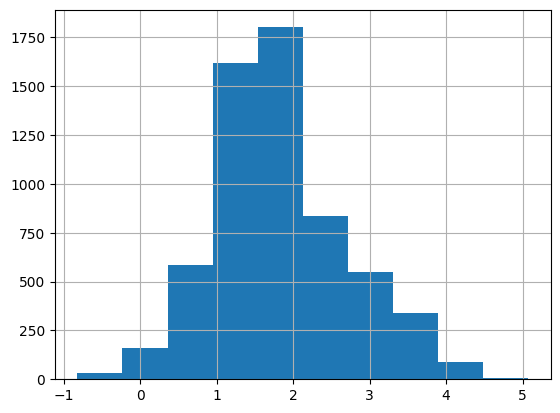

In [ ]:
priceLog.hist()

# Converting nominal categorical variables to numeric
* For this step we are using pandas.get_dummies to change categorical data into a form which could be ordered


In [ ]:
# Applying the variables with get_dummy() and represent in integer form so it is numeric
MLdata_Numeric=pd.get_dummies(MLdata, dtype=int)

# Adding the normalised target variable to the dataset
MLdata_Numeric['Price']=priceLog

#Saving this version of dataset for the future
MLdata_Numeric.to_pickle('MLdata_Numeric.pkl')

display(MLdata_Numeric)

,Engine,Power,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Price
0,998.0,58.16,1,0,0,0,0,0,1,0.559616
1,1582.0,126.20,0,1,0,0,0,0,1,2.525729
2,1199.0,88.70,0,0,0,0,1,0,1,1.504077
3,1248.0,88.76,0,1,0,0,0,0,1,1.791759
4,1968.0,140.80,0,1,0,0,0,1,0,2.875822
...,...,...,...,...,...,...,...,...,...,...
6014,1248.0,74.00,0,1,0,0,0,0,1,1.558145
6015,1120.0,71.00,0,1,0,0,0,0,1,1.386294
6016,2498.0,112.00,0,1,0,0,0,0,1,1.064711
6017,998.0,67.10,0,0,0,0,1,0,1,0.974560


# Step 17: Machine Learning Model Development
* There is a separate test dataset provided but due to it lacking the target variable, it not be used for the time being
* Because the accuracy test later requires the recorded target variable, the given test dataset will not be used

In [ ]:
# Separate Target variable from predictors
targetVar = 'Price'
predictors = ['Engine', 'Power', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual']

x = MLdata_Numeric[predictors].values
y = MLdata_Numeric[targetVar].values

# Split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=600)


# Step 18: Multiple Linear Regression Algorithm

In [ ]:
#Import the necessary library
from sklearn import linear_model

#Applies linear regression model on the training data
regr = linear_model.LinearRegression()

linearModel = regr.fit(x_train, y_train)



#Step 19: Model validation and accuracy calculation
* For accuracy calculations it will be gauged with r^2 test, Mean Absolute Percentage Error (MAPE) test and cross validation
 * since the algorithm is predicting a value, MAPE should be used as it tests the accuracy of the prediction
* Since the target variable was normalised, the process must be reversed for this part expecially since it would result in dividing by 0.
* This test will be applied on other models

In [ ]:
# Generalised variables for validation and accuracy tests
currentModel = linearModel
currentPrediction = currentModel.predict(x_test)

################################################################################
#r2 test
from sklearn.metrics import r2_score

r2_score = r2_score(y_train, currentModel.predict(x_train))

print(f'r2 score: {r2_score}')


################################################################################
# MAPE test
realVal = np.exp(y_test.tolist())
predictVal = np.exp(currentModel.predict(x_test))
errorList = []

#Loop for all value index of the list
for index in range(len(realVal)):

# finds the percentage error of the predicted and real value as a decimal
  percError = (realVal[index] - predictVal[index]) / realVal[index]
  percError = abs(percError)
# Appends the error value to list
  errorList.append(percError)

MAPE = sum(errorList)/len(errorList)

print(f'MAPE inacurracy percentage: {round ((MAPE)*100, 2)}%')

################################################################################
# Cross Validation
#Importing k-fold and cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# using 10-fold since it is the common ammount
k_folds = KFold(n_splits = 10)

scores = cross_val_score(currentModel, x, y, cv = k_folds)
average_score = scores.mean()

print(f'10-fold cross validation accuracy results: {scores}')
print(f'cross validation accuracy: {round(average_score*100, 2)}%')

################################################################################
# Displays a sample of the real and predicted data

dataSample = pd.DataFrame(data=x_test, columns=predictors)
dataSample['TargetVariable'] = np.exp(y_test)
# Reverts the log normalisation done before with exponent
dataSample[('Predicted '+targetVar)] = np.round(np.exp(currentPrediction), 2)

print(dataSample.head())

r2 score: 0.6622965424118143
MAPE inacurracy percentage: 46.92%
10-fold cross validation accuracy results: [0.65693237 0.66390576 0.63821191 0.68462009 0.6869403  0.63755092
 0.63352483 0.6477737  0.65859848 0.64995519]
cross validation accuracy: 65.58%
   Engine   Power  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  \
0   814.0   55.20            0.0               0.0                 0.0   
1  1248.0   73.90            0.0               1.0                 0.0   
2  2148.0  170.00            0.0               1.0                 0.0   
3  1198.0   73.75            0.0               0.0                 0.0   
4  1248.0   74.00            0.0               1.0                 0.0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  \
0            0.0               1.0                     0.0   
1            0.0               0.0                     0.0   
2            0.0               0.0                     0.0   
3            0.0               1.0                   

# KNN algorithm
* Second algorithm will be K-nearest neighbour algorithm


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# using 3 neighbors for better effect
knn = KNeighborsRegressor(n_neighbors=3)
#fitting the data into the algorithm
knnModel = knn.fit(x_train, y_train)

In [ ]:
#KNN test

# Generalised variables for validation and accuracy tests
currentModel = knnModel
currentPrediction = currentModel.predict(x_test)

################################################################################
#r2 test
from sklearn.metrics import r2_score

r2_score = r2_score(y_train, currentModel.predict(x_train))

print(f'r2 score: {r2_score}')


################################################################################
# MAPE test
realVal = np.exp(y_test.tolist())
predictVal = np.exp(currentModel.predict(x_test))
errorList = []

#Loop for all value index of the list
for index in range(len(realVal)):

# finds the percentage error of the predicted and real value as a decimal
  percError = (realVal[index] - predictVal[index]) / realVal[index]
  percError = abs(percError)
# Appends the error value to list
  errorList.append(percError)

MAPE = sum(errorList)/len(errorList)

print(f'MAPE inacurracy percentage: {round ((MAPE)*100, 2)}%')

################################################################################
# Cross Validation
#Importing k-fold and cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# using 10-fold since it is the common ammount
k_folds = KFold(n_splits = 10)

scores = cross_val_score(currentModel, x, y, cv = k_folds)
average_score = scores.mean()

print(f'10-fold cross validation accuracy results: {scores}')
print(f'cross validation accuracy: {round(average_score*100, 2)}%')

################################################################################
# Displays a sample of the real and predicted data

dataSample = pd.DataFrame(data=x_test, columns=predictors)
dataSample['TargetVariable'] = np.exp(y_test)
# Reverts the log normalisation done before with exponent
dataSample[('Predicted '+targetVar)] = np.round(np.exp(currentPrediction), 2)

print(dataSample.head())


r2 score: 0.8571904816612255
MAPE inacurracy percentage: 30.56%
10-fold cross validation accuracy results: [0.81223843 0.79241212 0.77803485 0.82727255 0.82120993 0.77703264
 0.78959278 0.80567046 0.7988231  0.80228083]
cross validation accuracy: 80.05%
   Engine   Power  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  \
0   814.0   55.20            0.0               0.0                 0.0   
1  1248.0   73.90            0.0               1.0                 0.0   
2  2148.0  170.00            0.0               1.0                 0.0   
3  1198.0   73.75            0.0               0.0                 0.0   
4  1248.0   74.00            0.0               1.0                 0.0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  \
0            0.0               1.0                     0.0   
1            0.0               0.0                     0.0   
2            0.0               0.0                     0.0   
3            0.0               1.0                   

# XGBoost algorithm
* third model is the XGboost algorithm


In [ ]:
from xgboost import XGBRegressor
# XG model setup, using squarederror instead of linear due to deprecation of linear
xg = XGBRegressor(max_depth=2, learning_rate=0.1,n_estimators=1000, objective='reg:squarederror', booster='gbtree')
# Fitting data into the model
xgModel = xg.fit(x_train,y_train)


In [ ]:
#XGboost test

# Generalised variables for validation and accuracy tests
currentModel = xgModel
currentPrediction = currentModel.predict(x_test)

################################################################################
#r2 test
from sklearn.metrics import r2_score

r2_score = r2_score(y_train, currentModel.predict(x_train))

print(f'r2 score: {r2_score}')


################################################################################
# MAPE test
realVal = np.exp(y_test.tolist())
predictVal = np.exp(currentModel.predict(x_test))
errorList = []

#Loop for all value index of the list
for index in range(len(realVal)):

# finds the percentage error of the predicted and real value as a decimal
  percError = (realVal[index] - predictVal[index]) / realVal[index]
  percError = abs(percError)
# Appends the error value to list
  errorList.append(percError)

MAPE = sum(errorList)/len(errorList)

print(f'MAPE inacurracy percentage: {round ((MAPE)*100, 2)}%')

################################################################################
# Cross Validation
#Importing k-fold and cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# using 10-fold since it is the common ammount
k_folds = KFold(n_splits = 10)

scores = cross_val_score(currentModel, x, y, cv = k_folds)
average_score = scores.mean()

print(f'10-fold cross validation accuracy results: {scores}')
print(f'cross validation accuracy: {round(average_score*100, 2)}%')

################################################################################
# Displays a sample of the real and predicted data

dataSample = pd.DataFrame(data=x_test, columns=predictors)
dataSample['TargetVariable'] = np.exp(y_test)
# Reverts the log normalisation done before with exponent
dataSample[('Predicted '+targetVar)] = np.round(np.exp(currentPrediction), 2)

print(dataSample.head())


r2 score: 0.8363617087106487
MAPE inacurracy percentage: 30.91%
10-fold cross validation accuracy results: [0.82941808 0.79390523 0.77426131 0.83063843 0.81893514 0.79662411
 0.78304145 0.79947634 0.80890819 0.80580241]
cross validation accuracy: 80.41%
   Engine   Power  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Electric  \
0   814.0   55.20            0.0               0.0                 0.0   
1  1248.0   73.90            0.0               1.0                 0.0   
2  2148.0  170.00            0.0               1.0                 0.0   
3  1198.0   73.75            0.0               0.0                 0.0   
4  1248.0   74.00            0.0               1.0                 0.0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Automatic  \
0            0.0               1.0                     0.0   
1            0.0               0.0                     0.0   
2            0.0               0.0                     0.0   
3            0.0               1.0                   

# Observations:
* Overall, KNN and XGboost have fairly close scores
* KNN has slightly better r2 and MAPE scores

# Step 20: Model Deployment
* KNN will be deployed due to highest overall accuracy

# Github repository
link: https://github.com/u3272527/ST1-Capstone-Project